<a href="https://colab.research.google.com/github/daniyal9538/CID/blob/master/Copy_of_CID_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Daniyal Selani

#Get data from bucket

Get data from cloud storage bucket and store files into notebook memory
The files are retrieved sequentially 

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'test-demo-222423'
bucket_name = 'cid_training_data'
# Create the service client.
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

from apiclient.http import MediaIoBaseDownload

for i in range(1, 11):
  download_name = "training_data-{}.npy".format(i)
  path_name = "balanced_data/balanced_data-mod-5-{}.npy".format(i)
  
  with open(download_name, 'wb') as f:
    # Download the file from a given Google Cloud Storage bucket.
    request = gcs_service.objects().get_media(bucket=bucket_name,
                                              object=path_name)
    media = MediaIoBaseDownload(f, request)

    done = False
    while not done:
      # _ is a placeholder for a progress object that we ignore.
      # (Our file is small, so we skip reporting progress.)
      _, done = media.next_chunk()        

  print('Download complete', download_name)

Download complete training_data-1.npy
Download complete training_data-2.npy
Download complete training_data-3.npy
Download complete training_data-4.npy
Download complete training_data-5.npy
Download complete training_data-6.npy
Download complete training_data-7.npy
Download complete training_data-8.npy
Download complete training_data-9.npy
Download complete training_data-10.npy


#Test Data

In [0]:
import numpy as np
from matplotlib import pyplot as plt
import csv

9437
[0, 0, 0, 1, 0]


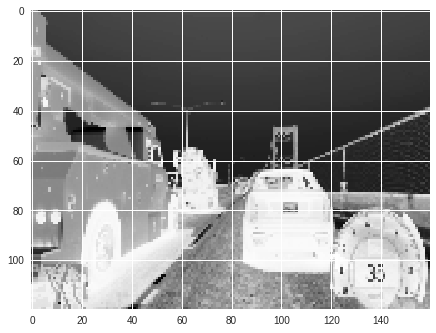

In [0]:




fileName =  "training_data-{}.npy".format(6)
test = np.load(fileName)
print(len(test))
i =9400

print(test[i][1])
image= test[i][0]
plt.imshow(image)
plt.show()    

#Count Data

In [0]:
count = [0]*9

for x in range(1, 7):
  tempCount = [0]*9
  filename = "training_data-{}.npy".format(x)
  data = np.load(filename)
  for i in data:
    
    t = np.argmax(i[1])
    count[t]+=1
    tempCount[t]+=1
  sum =0
  for i in tempCount:
    sum+=i
  print(sum)
  print(tempCount)
  s=[100*j/sum for j in tempCount]
  print (s)
  with open('dataD.csv','a') as fd:
    writer = csv.writer(fd)
    writer.writerow(s)
  with open('dataC.csv','a') as fd:
    writer = csv.writer(fd)
    writer.writerow(tempCount)
sum =0
for i in count:
    sum+=i
print(sum)
print(count)
s=[100*j/sum for j in count]
print (s)
with open('dataD.csv','a') as fd:
  writer = csv.writer(fd)
  writer.writerow(s)
with open('dataC.csv','a') as fd:
  writer = csv.writer(fd)
  writer.writerow(count)
#w s a d wa wd sa sd nk

10000
[2671, 313, 60, 112, 405, 225, 3, 29, 6182]
[26.71, 3.13, 0.6, 1.12, 4.05, 2.25, 0.03, 0.29, 61.82]
10000
[2689, 328, 80, 101, 282, 255, 3, 0, 6262]
[26.89, 3.28, 0.8, 1.01, 2.82, 2.55, 0.03, 0.0, 62.62]
10000
[4446, 293, 140, 121, 350, 239, 3, 9, 4399]
[44.46, 2.93, 1.4, 1.21, 3.5, 2.39, 0.03, 0.09, 43.99]
10000
[3401, 494, 59, 51, 271, 271, 15, 7, 5431]
[34.01, 4.94, 0.59, 0.51, 2.71, 2.71, 0.15, 0.07, 54.31]
10000
[3002, 385, 76, 79, 167, 159, 0, 0, 6132]
[30.02, 3.85, 0.76, 0.79, 1.67, 1.59, 0.0, 0.0, 61.32]
10000
[3205, 387, 63, 71, 228, 112, 2, 16, 5916]
[32.05, 3.87, 0.63, 0.71, 2.28, 1.12, 0.02, 0.16, 59.16]
60000
[19414, 2200, 478, 535, 1703, 1261, 26, 61, 34322]
[32.35666666666667, 3.6666666666666665, 0.7966666666666666, 0.8916666666666667, 2.8383333333333334, 2.1016666666666666, 0.043333333333333335, 0.10166666666666667, 57.20333333333333]


# Get dependecies


In [0]:
!pip install -q tflearn
import numpy as np
import time
from random import shuffle

In [0]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d,avg_pool_2d, conv_3d, max_pool_3d, avg_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.merge_ops import merge

#Define models

Define the model architecture that is going to be trained

In [0]:
def modified_alexnet(width, height, lr, output=4):
    network = input_data(shape=[None, width, height, 1], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = conv_2d(network, 256, 5, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    
   
    
    network = fully_connected(network, 4096, activation='relu')
    network = dropout(network, 0.85)
    network = fully_connected(network, output, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network, checkpoint_path='model_alexnetv0.13',
                        max_checkpoints=1, tensorboard_verbose=0, tensorboard_dir='log')

    return model

In [0]:

def inception_v3(width, height, frame_count, lr, output=9, model_name = 'inceptionv3'):
    network = input_data(shape=[None, width, height,3], name='input')
    conv1_7_7 = conv_2d(network, 64, 7, strides=2, activation='relu', name = 'conv1_7_7_s2')
    pool1_3_3 = max_pool_2d(conv1_7_7, 3,strides=2)
    pool1_3_3 = local_response_normalization(pool1_3_3)
    conv2_3_3_reduce = conv_2d(pool1_3_3, 64,1, activation='relu',name = 'conv2_3_3_reduce')
    conv2_3_3 = conv_2d(conv2_3_3_reduce, 192,3, activation='relu', name='conv2_3_3')
    conv2_3_3 = local_response_normalization(conv2_3_3)
    pool2_3_3 = max_pool_2d(conv2_3_3, kernel_size=3, strides=2, name='pool2_3_3_s2')
    inception_3a_1_1 = conv_2d(pool2_3_3, 64, 1, activation='relu', name='inception_3a_1_1')
    inception_3a_3_3_reduce = conv_2d(pool2_3_3, 96,1, activation='relu', name='inception_3a_3_3_reduce')
    inception_3a_3_3 = conv_2d(inception_3a_3_3_reduce, 128,filter_size=3,  activation='relu', name = 'inception_3a_3_3')
    inception_3a_5_5_reduce = conv_2d(pool2_3_3,16, filter_size=1,activation='relu', name ='inception_3a_5_5_reduce' )
    inception_3a_5_5 = conv_2d(inception_3a_5_5_reduce, 32, filter_size=5, activation='relu', name= 'inception_3a_5_5')
    inception_3a_pool = max_pool_2d(pool2_3_3, kernel_size=3, strides=1, )
    inception_3a_pool_1_1 = conv_2d(inception_3a_pool, 32, filter_size=1, activation='relu', name='inception_3a_pool_1_1')

    # merge the inception_3a__
    inception_3a_output = merge([inception_3a_1_1, inception_3a_3_3, inception_3a_5_5, inception_3a_pool_1_1], mode='concat', axis=3)

    inception_3b_1_1 = conv_2d(inception_3a_output, 128,filter_size=1,activation='relu', name= 'inception_3b_1_1' )
    inception_3b_3_3_reduce = conv_2d(inception_3a_output, 128, filter_size=1, activation='relu', name='inception_3b_3_3_reduce')
    inception_3b_3_3 = conv_2d(inception_3b_3_3_reduce, 192, filter_size=3,  activation='relu',name='inception_3b_3_3')
    inception_3b_5_5_reduce = conv_2d(inception_3a_output, 32, filter_size=1, activation='relu', name = 'inception_3b_5_5_reduce')
    inception_3b_5_5 = conv_2d(inception_3b_5_5_reduce, 96, filter_size=5,  name = 'inception_3b_5_5')
    inception_3b_pool = max_pool_2d(inception_3a_output, kernel_size=3, strides=1,  name='inception_3b_pool')
    inception_3b_pool_1_1 = conv_2d(inception_3b_pool, 64, filter_size=1,activation='relu', name='inception_3b_pool_1_1')

    #merge the inception_3b_*
    inception_3b_output = merge([inception_3b_1_1, inception_3b_3_3, inception_3b_5_5, inception_3b_pool_1_1], mode='concat',axis=3,name='inception_3b_output')

    pool3_3_3 = max_pool_2d(inception_3b_output, kernel_size=3, strides=2, name='pool3_3_3')
    inception_4a_1_1 = conv_2d(pool3_3_3, 192, filter_size=1, activation='relu', name='inception_4a_1_1')
    inception_4a_3_3_reduce = conv_2d(pool3_3_3, 96, filter_size=1, activation='relu', name='inception_4a_3_3_reduce')
    inception_4a_3_3 = conv_2d(inception_4a_3_3_reduce, 208, filter_size=3,  activation='relu', name='inception_4a_3_3')
    inception_4a_5_5_reduce = conv_2d(pool3_3_3, 16, filter_size=1, activation='relu', name='inception_4a_5_5_reduce')
    inception_4a_5_5 = conv_2d(inception_4a_5_5_reduce, 48, filter_size=5,  activation='relu', name='inception_4a_5_5')
    inception_4a_pool = max_pool_2d(pool3_3_3, kernel_size=3, strides=1,  name='inception_4a_pool')
    inception_4a_pool_1_1 = conv_2d(inception_4a_pool, 64, filter_size=1, activation='relu', name='inception_4a_pool_1_1')

    inception_4a_output = merge([inception_4a_1_1, inception_4a_3_3, inception_4a_5_5, inception_4a_pool_1_1], mode='concat', axis=3, name='inception_4a_output')


    inception_4b_1_1 = conv_2d(inception_4a_output, 160, filter_size=1, activation='relu', name='inception_4a_1_1')
    inception_4b_3_3_reduce = conv_2d(inception_4a_output, 112, filter_size=1, activation='relu', name='inception_4b_3_3_reduce')
    inception_4b_3_3 = conv_2d(inception_4b_3_3_reduce, 224, filter_size=3, activation='relu', name='inception_4b_3_3')
    inception_4b_5_5_reduce = conv_2d(inception_4a_output, 24, filter_size=1, activation='relu', name='inception_4b_5_5_reduce')
    inception_4b_5_5 = conv_2d(inception_4b_5_5_reduce, 64, filter_size=5,  activation='relu', name='inception_4b_5_5')

    inception_4b_pool = max_pool_2d(inception_4a_output, kernel_size=3, strides=1,  name='inception_4b_pool')
    inception_4b_pool_1_1 = conv_2d(inception_4b_pool, 64, filter_size=1, activation='relu', name='inception_4b_pool_1_1')

    inception_4b_output = merge([inception_4b_1_1, inception_4b_3_3, inception_4b_5_5, inception_4b_pool_1_1], mode='concat', axis=3, name='inception_4b_output')


    inception_4c_1_1 = conv_2d(inception_4b_output, 128, filter_size=1, activation='relu',name='inception_4c_1_1')
    inception_4c_3_3_reduce = conv_2d(inception_4b_output, 128, filter_size=1, activation='relu', name='inception_4c_3_3_reduce')
    inception_4c_3_3 = conv_2d(inception_4c_3_3_reduce, 256,  filter_size=3, activation='relu', name='inception_4c_3_3')
    inception_4c_5_5_reduce = conv_2d(inception_4b_output, 24, filter_size=1, activation='relu', name='inception_4c_5_5_reduce')
    inception_4c_5_5 = conv_2d(inception_4c_5_5_reduce, 64,  filter_size=5, activation='relu', name='inception_4c_5_5')

    inception_4c_pool = max_pool_2d(inception_4b_output, kernel_size=3, strides=1)
    inception_4c_pool_1_1 = conv_2d(inception_4c_pool, 64, filter_size=1, activation='relu', name='inception_4c_pool_1_1')

    inception_4c_output = merge([inception_4c_1_1, inception_4c_3_3, inception_4c_5_5, inception_4c_pool_1_1], mode='concat', axis=3,name='inception_4c_output')

    inception_4d_1_1 = conv_2d(inception_4c_output, 112, filter_size=1, activation='relu', name='inception_4d_1_1')
    inception_4d_3_3_reduce = conv_2d(inception_4c_output, 144, filter_size=1, activation='relu', name='inception_4d_3_3_reduce')
    inception_4d_3_3 = conv_2d(inception_4d_3_3_reduce, 288, filter_size=3, activation='relu', name='inception_4d_3_3')
    inception_4d_5_5_reduce = conv_2d(inception_4c_output, 32, filter_size=1, activation='relu', name='inception_4d_5_5_reduce')
    inception_4d_5_5 = conv_2d(inception_4d_5_5_reduce, 64, filter_size=5,  activation='relu', name='inception_4d_5_5')
    inception_4d_pool = max_pool_2d(inception_4c_output, kernel_size=3, strides=1,  name='inception_4d_pool')
    inception_4d_pool_1_1 = conv_2d(inception_4d_pool, 64, filter_size=1, activation='relu', name='inception_4d_pool_1_1')

    inception_4d_output = merge([inception_4d_1_1, inception_4d_3_3, inception_4d_5_5, inception_4d_pool_1_1], mode='concat', axis=3, name='inception_4d_output')

    inception_4e_1_1 = conv_2d(inception_4d_output, 256, filter_size=1, activation='relu', name='inception_4e_1_1')
    inception_4e_3_3_reduce = conv_2d(inception_4d_output, 160, filter_size=1, activation='relu', name='inception_4e_3_3_reduce')
    inception_4e_3_3 = conv_2d(inception_4e_3_3_reduce, 320, filter_size=3, activation='relu', name='inception_4e_3_3')
    inception_4e_5_5_reduce = conv_2d(inception_4d_output, 32, filter_size=1, activation='relu', name='inception_4e_5_5_reduce')
    inception_4e_5_5 = conv_2d(inception_4e_5_5_reduce, 128,  filter_size=5, activation='relu', name='inception_4e_5_5')
    inception_4e_pool = max_pool_2d(inception_4d_output, kernel_size=3, strides=1,  name='inception_4e_pool')
    inception_4e_pool_1_1 = conv_2d(inception_4e_pool, 128, filter_size=1, activation='relu', name='inception_4e_pool_1_1')


    inception_4e_output = merge([inception_4e_1_1, inception_4e_3_3, inception_4e_5_5,inception_4e_pool_1_1],axis=3, mode='concat')

    pool4_3_3 = max_pool_2d(inception_4e_output, kernel_size=3, strides=2, name='pool_3_3')


    inception_5a_1_1 = conv_2d(pool4_3_3, 256, filter_size=1, activation='relu', name='inception_5a_1_1')
    inception_5a_3_3_reduce = conv_2d(pool4_3_3, 160, filter_size=1, activation='relu', name='inception_5a_3_3_reduce')
    inception_5a_3_3 = conv_2d(inception_5a_3_3_reduce, 320, filter_size=3, activation='relu', name='inception_5a_3_3')
    inception_5a_5_5_reduce = conv_2d(pool4_3_3, 32, filter_size=1, activation='relu', name='inception_5a_5_5_reduce')
    inception_5a_5_5 = conv_2d(inception_5a_5_5_reduce, 128, filter_size=5,  activation='relu', name='inception_5a_5_5')
    inception_5a_pool = max_pool_2d(pool4_3_3, kernel_size=3, strides=1,  name='inception_5a_pool')
    inception_5a_pool_1_1 = conv_2d(inception_5a_pool, 128, filter_size=1,activation='relu', name='inception_5a_pool_1_1')

    inception_5a_output = merge([inception_5a_1_1, inception_5a_3_3, inception_5a_5_5, inception_5a_pool_1_1], axis=3,mode='concat')


    inception_5b_1_1 = conv_2d(inception_5a_output, 384, filter_size=1,activation='relu', name='inception_5b_1_1')
    inception_5b_3_3_reduce = conv_2d(inception_5a_output, 192, filter_size=1, activation='relu', name='inception_5b_3_3_reduce')
    inception_5b_3_3 = conv_2d(inception_5b_3_3_reduce, 384,  filter_size=3,activation='relu', name='inception_5b_3_3')
    inception_5b_5_5_reduce = conv_2d(inception_5a_output, 48, filter_size=1, activation='relu', name='inception_5b_5_5_reduce')
    inception_5b_5_5 = conv_2d(inception_5b_5_5_reduce,128, filter_size=5,  activation='relu', name='inception_5b_5_5' )
    inception_5b_pool = max_pool_2d(inception_5a_output, kernel_size=3, strides=1,  name='inception_5b_pool')
    inception_5b_pool_1_1 = conv_2d(inception_5b_pool, 128, filter_size=1, activation='relu', name='inception_5b_pool_1_1')
    inception_5b_output = merge([inception_5b_1_1, inception_5b_3_3, inception_5b_5_5, inception_5b_pool_1_1], axis=3, mode='concat')

    pool5_7_7 = avg_pool_2d(inception_5b_output, kernel_size=7, strides=1)
    pool5_7_7 = dropout(pool5_7_7, 0.4)

    
    loss = fully_connected(pool5_7_7, output,activation='softmax')


    
    network = regression(loss, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')
    
    model = tflearn.DNN(network, 
                        max_checkpoints=0, tensorboard_verbose=0,tensorboard_dir='log')


    return model


In [0]:

def alexnet(width, height, frame_count, lr, output=9, model_name = 'alexnet'):
    network = input_data(shape=[None, width, height, 3], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = conv_2d(network, 256, 5, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, output, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network,
                        max_checkpoints=0, tensorboard_verbose=0, tensorboard_dir='log')

    return model

In [0]:

def alexnetNoPool(width, height, frame_count, lr, output=9, model_name = 'sentnet_color.model'):
    network = input_data(shape=[None, width, height, 3], name='input')
    network = conv_2d(network, 96, 11, strides=4, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 256, 5, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = conv_2d(network, 256, 5, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 384, 3, activation='relu')
    network = conv_2d(network, 256, 3, activation='relu')
    #network = max_pool_2d(network, 3, strides=2)
    network = local_response_normalization(network)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, 4096, activation='tanh')
    network = dropout(network, 0.5)
    network = fully_connected(network, output, activation='softmax')
    network = regression(network, optimizer='momentum',
                         loss='categorical_crossentropy',
                         learning_rate=lr, name='targets')

    model = tflearn.DNN(network,
                        max_checkpoints=0, tensorboard_verbose=0, tensorboard_dir='log')

    return model

# Instantiate model

Specify hyperparameters of training session

In [0]:

FILE_I_END = 10

WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 30

MODEL_NAME = 'cidV0.26'
#1.11 incpetionv3 balanced 30 epochs'
#1.1 inception v3 balanced 
#1.21 alexnet balanced
#1.22 alexnet no pooling balanced
#PREV_MODEL = 'CID-hw-v1.1'

#LOAD_MODEL = True




Instantiate all models

In [0]:
model =modified_alexnet(160, 120, 1e-3, output=5)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
model2 = alexnet(WIDTH, HEIGHT, 3, LR, output=9, model_name=MODEL_NAME)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [0]:
model3 = alexnetNoPool(WIDTH, HEIGHT, 3, LR, output=9, model_name=MODEL_NAME)

If retarining a previously trained model, load model into memory

In [0]:
#IF load_model == true load a previoes model
if LOAD_MODEL:
  model1.load(PREV_MODEL)
  print("Model loaded")

INFO:tensorflow:Restoring parameters from /content/CID-hw-v1.1
Model loaded


# Start training

Take all files in dataset, divide each file into batches
The data is also parsed so that the model can be validated against unique data that the model has not ever seen
The model is saved everytime a milestone is reached

In [0]:
for e in range(EPOCHS):
    now = time.time()
    #data_order = [i for i in range(1,FILE_I_END+1)]
    data_order = [i for i in range(1,FILE_I_END+1)]
    shuffle(data_order)
    for count,i in enumerate(data_order):
        
        try:
            file_name = 'training_data-{}.npy'.format(i)
            # full file info
            train_data = np.load(file_name)
            print(file_name,len(train_data))

            # always validating unique data: 
            #shuffle(train_data)
            train = train_data[:-940]
            test = train_data[-940:]
            X= []
            Y=[]
            for i in train:
              X.append(i[0])
              Y.append(i[1])
            
            X=np.array(X)
            Y=np.array(Y)
            X = X.reshape([-1,WIDTH,HEIGHT,1])
            
            test_x =[]
            test_y=[]

            for i in test:
              test_x.append(i[0])
              test_y.append(i[1])
            
            test_x=np.array(test_x)
            test_y=np.array(test_y)
            test_x = test_x.reshape([-1,WIDTH,HEIGHT,1])
           
             #check model
            model.fit({'input': X}, {'targets': Y}, n_epoch = 1, validation_set = ({'input': test_x}, {'targets': test_y}),
                snapshot_step = 500, show_metric = True, run_id = MODEL_NAME)
            print(e)

            if count%10 == 0:
                print('SAVING MODEL!', e)
                model.save(MODEL_NAME)
                    
        except Exception as e:
          print(str(e))
          
    print("TIME for Epoch", time.time()-now, e)





Training Step: 33941  | total loss: 0.15134 | time: 21.869s
| Momentum | epoch: 256 | loss: 0.15134 - acc: 0.9485 -- iter: 1664/8497


# Get log files


This code block allows the notebook to stay active even after training is finished, if the notebook remains idle for greater than 90 minutes, it is reset and shutown and all data is lost

In [0]:
while True:
  a=2+2

KeyboardInterrupt: ignored

Need to download all log files from training session to see the progress of training

In [0]:
from google.colab import files

for i in range(1544573666, 1544581972):
  try:
    path = 'log/CID-hw-v1.21/events.out.tfevents.{}.5ba575443244'.format(i)

    files.download(path)
  except Exception as e:
    pass
   # print(str(e))
#!gsutil cp  gs://{bucket_name}/Log/